ObsデータとMSMデータの差を比べる

In [27]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import sys
sys.path.append("../init_weather_data/")

import utc2jst as uj

In [46]:
def dew_point(t, rh):
    """相対湿度から絶対湿度にする方法

    Args:
        t (float): 気温
        rh (float): 相対湿度
    """
    A = 17.27
    B = 237.7
    alpha = ((A * t) / (B + t)) + np.log(rh/100.0)
    return (B * alpha) / (A - alpha)

def asd(t,rh):
    es =  6.1078 * 10**(7.5*t/(t+237.3))
    e = es * rh / 100
    td = (237.3 * np.log10(6.1078/e))/(np.log10(e/6.1078) - 7.5)
    return td

In [50]:
date = dt.date(2022,1,3)

obsdf = pd.read_csv(f"../obs_data/{date.year}/{str(date.month).zfill(2)}/{date.year}_{str(date.month).zfill(2)}{str(date.day).zfill(2)}.csv").drop("時間",axis=1)
msmdf = pd.read_csv(f"../msm_jst_data/{date.year}/{str(date.month).zfill(2)}/{date.year}_{str(date.month).zfill(2)}{str(date.day).zfill(2)}.csv")
# msmdf["絶対湿度"] = msmdf.apply(lambda x: dew_point(x["気温"],x["相対湿度"]),axis=1)
msmdf["露点温度"] = msmdf.apply(lambda x: asd(x["気温"],x["相対湿度"]),axis=1)

In [51]:
display(obsdf.head(2))
display(msmdf.head(2))

,現地気圧,海面気圧,降水量,気温,露点温度,蒸気圧,湿度,風速,風向,日照時間,全天日射量,降雪,積雪,天気,雲量,視程,日付
0,1013.6,1016.6,0,1.4,-5.5,4.1,60,1.5,西,0.0,0.0,0,0,0,0.0,0.0,2022-01-03 00:00:00
1,1013.9,1016.9,0,2.6,-4.1,4.5,61,2.9,西北西,0.0,0.0,0,0,0,0.0,0.0,2022-01-03 01:00:00


,日付(JST),海面気圧,地上気圧,東風,西風,気温,相対湿度,降水量,雲量,下行短波放射線フラックス,露点温度
0,2022-01-03 00:00:00,101705.045748,98474.311587,2.837921,0.085627,5.586362,65.777523,200.000000,0.146669,665.0000,-0.297777
1,2022-01-03 01:00:00,101747.706298,98516.513421,2.220184,-0.067278,5.053210,69.915138,-0.000007,0.243336,0.0005,0.030084


In [52]:
msmdf

,日付(JST),海面気圧,地上気圧,東風,西風,気温,相対湿度,降水量,雲量,下行短波放射線フラックス,露点温度
0,2022-01-03 00:00:00,101705.045748,98474.311587,2.837921,0.085627,5.586362,65.777523,200.000000,0.146669,665.0000,-0.297777
1,2022-01-03 01:00:00,101747.706298,98516.513421,2.220184,-0.067278,5.053210,69.915138,-0.000007,0.243336,0.0005,0.030084
2,2022-01-03 02:00:00,101823.853086,98589.907915,1.174312,0.360856,3.566133,79.066514,-0.000007,0.000002,0.0005,0.286165
3,2022-01-03 03:00:00,101738.990702,98499.999660,-0.868502,1.070336,2.460626,85.502293,200.000000,0.000002,665.0000,0.283488
4,2022-01-03 04:00:00,101752.293454,98508.256541,-1.259939,0.892966,2.295976,86.548165,-0.000007,0.000002,0.0005,0.289165
5,2022-01-03 05:00:00,101808.715471,98558.715255,-1.229358,0.807339,2.005879,85.876146,-0.000007,0.000002,0.0005,-0.103162
6,2022-01-03 06:00:00,101794.495288,98547.706081,-0.556575,1.480122,2.559939,79.912844,200.000000,5.761669,665.0000,-0.547328
7,2022-01-03 07:00:00,101904.128313,98653.210666,-0.623853,1.437309,2.865717,79.103211,-0.000007,33.155001,0.0005,-0.388977
8,2022-01-03 08:00:00,101983.486110,98734.862041,-0.721713,1.131499,3.992132,72.561927,-0.000007,9.423335,62.6280,-0.480117
9,2022-01-03 09:00:00,101903.210882,98665.137272,-1.712538,0.819572,5.832030,66.736239,200.000000,0.731669,665.0000,0.135019


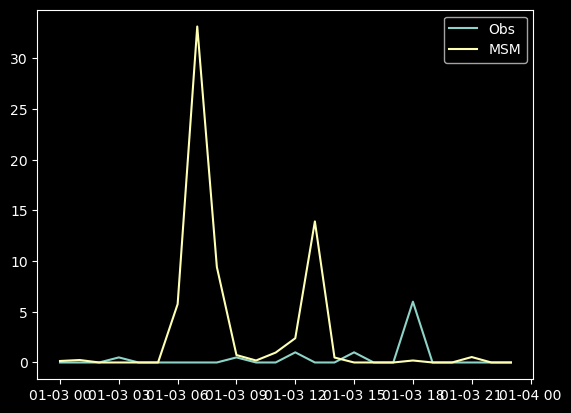

In [53]:
target = "雲量"

plt.plot(pd.to_datetime(obsdf["日付"]),obsdf[target],label="Obs")
plt.plot(pd.to_datetime(msmdf["日付(JST)"]),msmdf[target],label="MSM")
plt.legend()
plt.show()